<a href="https://colab.research.google.com/github/SAB-DataAnalysis/Finance_Tracker_Project_Python/blob/main/Finance_Tracker_Project_Data_Skills_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

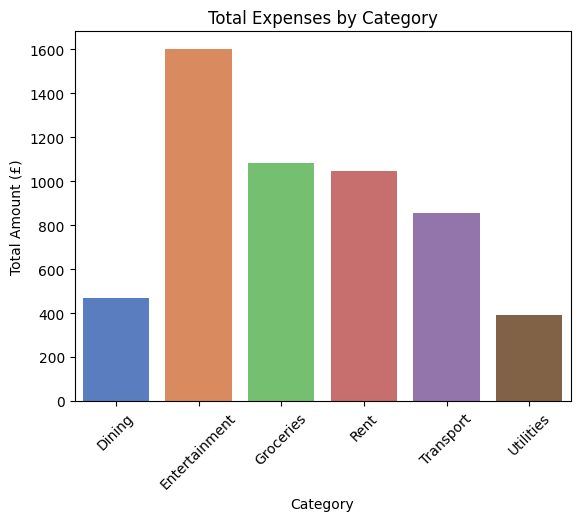

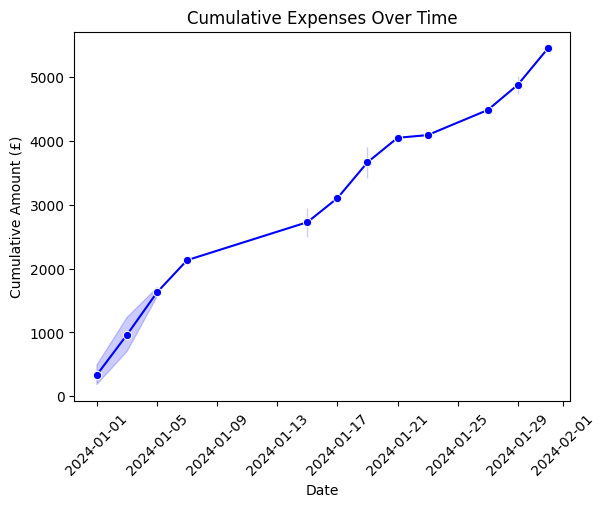

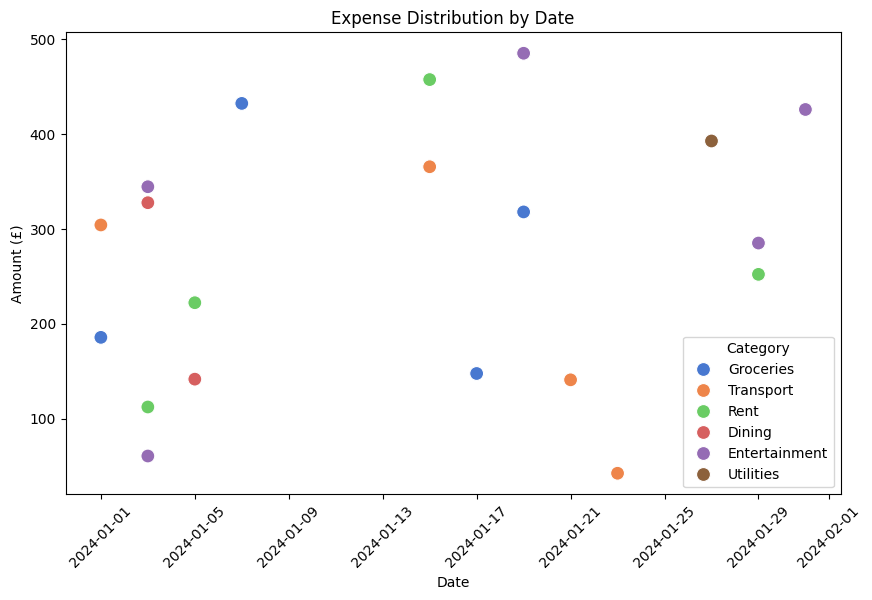

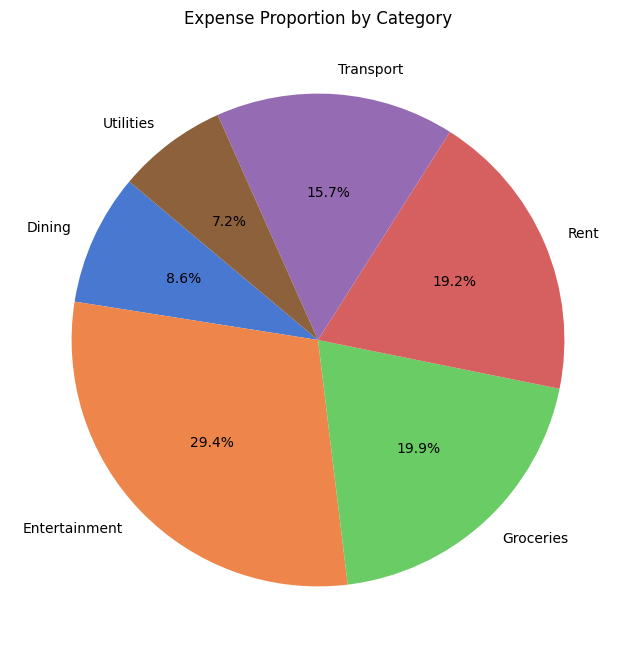

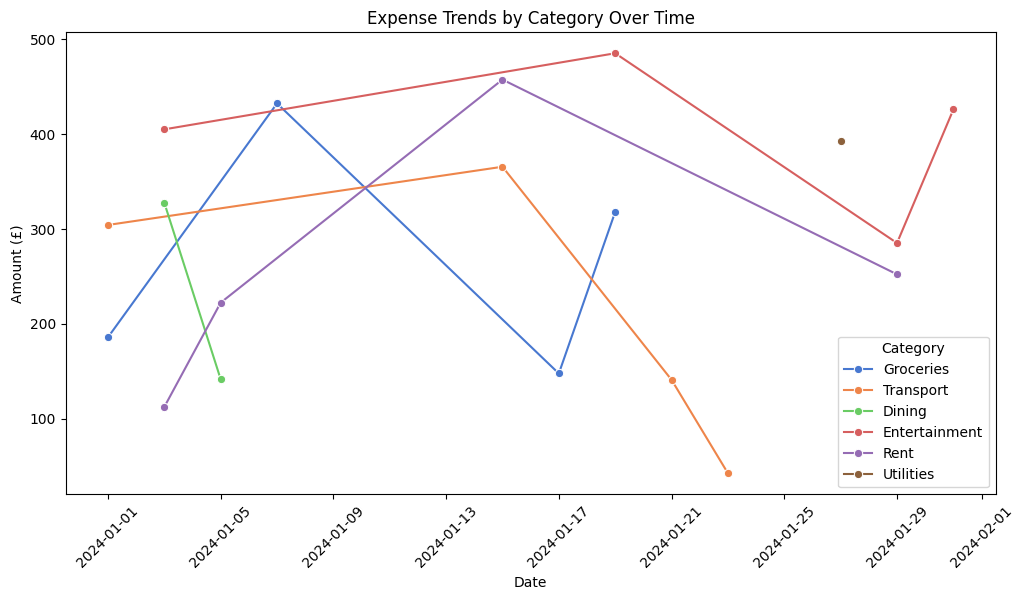

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

categories = ['Groceries', 'Rent', 'Entertainment', 'Utilities', 'Transport', 'Dining']
dates = pd.date_range(start='2024-01-01', end='2024-01-31', freq='2D')
data = {
    'Date': np.random.choice(dates, 20),
    'Category': [random.choice(categories) for _ in range(20)],
    'Amount': [round(random.uniform(10, 500), 2) for _ in range(20)]
}

df = pd.DataFrame(data)

category_totals = df.groupby('Category')['Amount'].sum().reset_index()

sns.barplot(data=category_totals, x='Category', y='Amount', hue='Category', palette='muted', dodge=False)
plt.title('Total Expenses by Category')
plt.ylabel('Total Amount (£)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

df = df.sort_values('Date')
df['Cumulative Expenses'] = df['Amount'].cumsum()

sns.lineplot(data=df, x='Date', y='Cumulative Expenses', marker='o', color='b')
plt.title('Cumulative Expenses Over Time')
plt.ylabel('Cumulative Amount (£)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='Amount', hue='Category', palette='muted', s=100)
plt.title('Expense Distribution by Date')
plt.ylabel('Amount (£)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

category_totals.set_index('Category', inplace=True)
plt.figure(figsize=(8, 8))
plt.pie(category_totals['Amount'], labels=category_totals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Expense Proportion by Category')
plt.show()

df['Date'] = pd.to_datetime(df['Date'])
category_trends = df.groupby(['Date', 'Category'])['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trends, x='Date', y='Amount', hue='Category', marker='o', palette='muted')
plt.title('Expense Trends by Category Over Time')
plt.ylabel('Amount (£)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()